# Animate TOPAZ4b 23

In [1]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
import pickle as pkl
import datetime
import netCDF4 as nc4

from src.data_preparation import load_data
from src.visualization import animate_topaz
from src.utils import modif_plot
from src.utils import load_config
from src.utils import tardisml_utils

rootdir = tardisml_utils.get_rootdir()

In [2]:
pca_dir = 'Leo/results/pca_i100-550_j150-629/'

In [3]:
fig_dir = 'Leo/results/animate_TP4b23_re/'

# Load TOPAZ 4b 23 with SIT assimilation

In [4]:
filename = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/sithick_TOPAZ4b23_2011_2022.nc'

In [5]:
sit_4b, chrono_4b = load_data.load_nc(filename, 'sithick', X_only=True)

# Load TOPAZ 4b 23 Freerun

In [6]:
filename = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/sithick_TOPAZ4b23_2011_2022_FreeRun.nc'

In [7]:
sit_fr, chrono_fr = load_data.load_nc(filename, 'sithick', X_only=True)

# Load SIC

In [8]:
print('Loading TOPAZ datasets...')
# filename = os.path.join(rootdir, pca_dir, f"siconc_TOPAZ4c_2011_2019.nc")
# siconc_f, chronosc_f = load_data.load_nc(filename, f'siconc', True)
# chrono_f = pd.DataFrame({'date':pd.to_datetime(X_f['time'].to_numpy())})

filename = os.path.join(rootdir, pca_dir, f"siconc_TOPAZ4b23_2011_2022.nc")
siconc_a, chronosc_a = load_data.load_nc(filename, f'siconc', True)

# LOAD FREE RUN TOPAZ4B
filename = os.path.join(rootdir, pca_dir, f"siconc_TOPAZ4b23_2011_2022_FreeRun.nc")
siconc_fr, chronosc_fr = load_data.load_nc(filename, f'siconc', True)

print('Done !')

Loading TOPAZ datasets...
Done !


## Mean SIT for Sea Ice Concentration > 15%

In [9]:
sitm_fr = sit_fr.where(siconc_fr>.15).mean(dim=('y','x')).compute()
sitm_4b = sit_4b.where(siconc_a>.15).mean(dim=('y','x')).compute()

# Plots

In [14]:
sit_frm = sit_fr.mean(('x','y'))
sit_4bm = sit_4b.mean(('x','y'))

In [9]:
# mean with only SIT > 0m

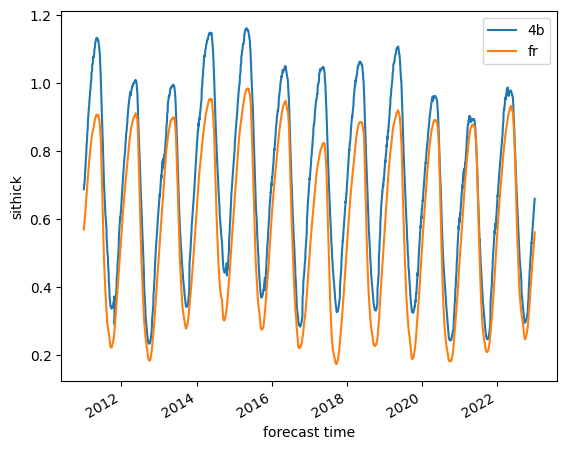

In [15]:
sit_4bm.plot(label='4b')
sit_frm.plot(label='fr')
plt.legend()

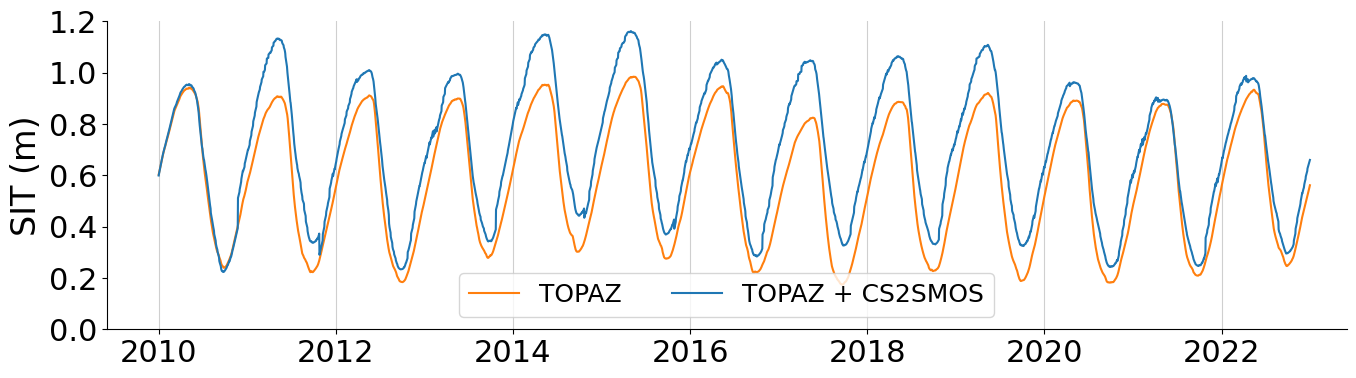

In [13]:
# ----------- plot -------------------

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 4))
# ax.plot(cs2.time, cs2, marker='.', c='#664186', label='CS2SMOS', ls='')  # observations
ax.plot(chrono_fr, sit_frm, label='TOPAZ', color='#ff7f0e')  # no assimilation
ax.plot(chrono_4b, sit_4bm, label='TOPAZ + CS2SMOS',color='#1f77b4')  # assimilated


ax.set_ylabel('SIT (m)')

# ax.set_yticklabels(lb_mn)



ax.set_xlim([datetime.datetime(2009,6,1), datetime.datetime(2023,6,1)])
ax.set_ylim([0, 1.2])

ax.xaxis.grid(alpha=0.6)

# ax2.set_xlim(ax.get_xlim())
ax.set_ylabel(f'SIT (m)')

ax.legend(ncol=3, fontsize=18, loc='lower center', markerscale=2)
# ax2.legend()
ax.spines[['right', 'top']].set_visible(False)


modif_plot.resize(fig, s=22)


savefig = False
if savefig:
    filename = f'TOPAZ4b23_4bFR_.png'
    plt.savefig(f"{rootdir}{fig_dir}{filename}", dpi=400) # , facecolor='white')
    print(f'Saved as {rootdir}{fig_dir}{filename}')

In [14]:
# exclude days not included in X4b
# to begin the 1 OCTOBER 2011
# FAIT A LA MAIN !!

------

------

In [116]:
from importlib import reload
reload(animate_topaz);

In [10]:
fig_dir

'Leo/results/animate_TP4b23_re/'

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20111215.png


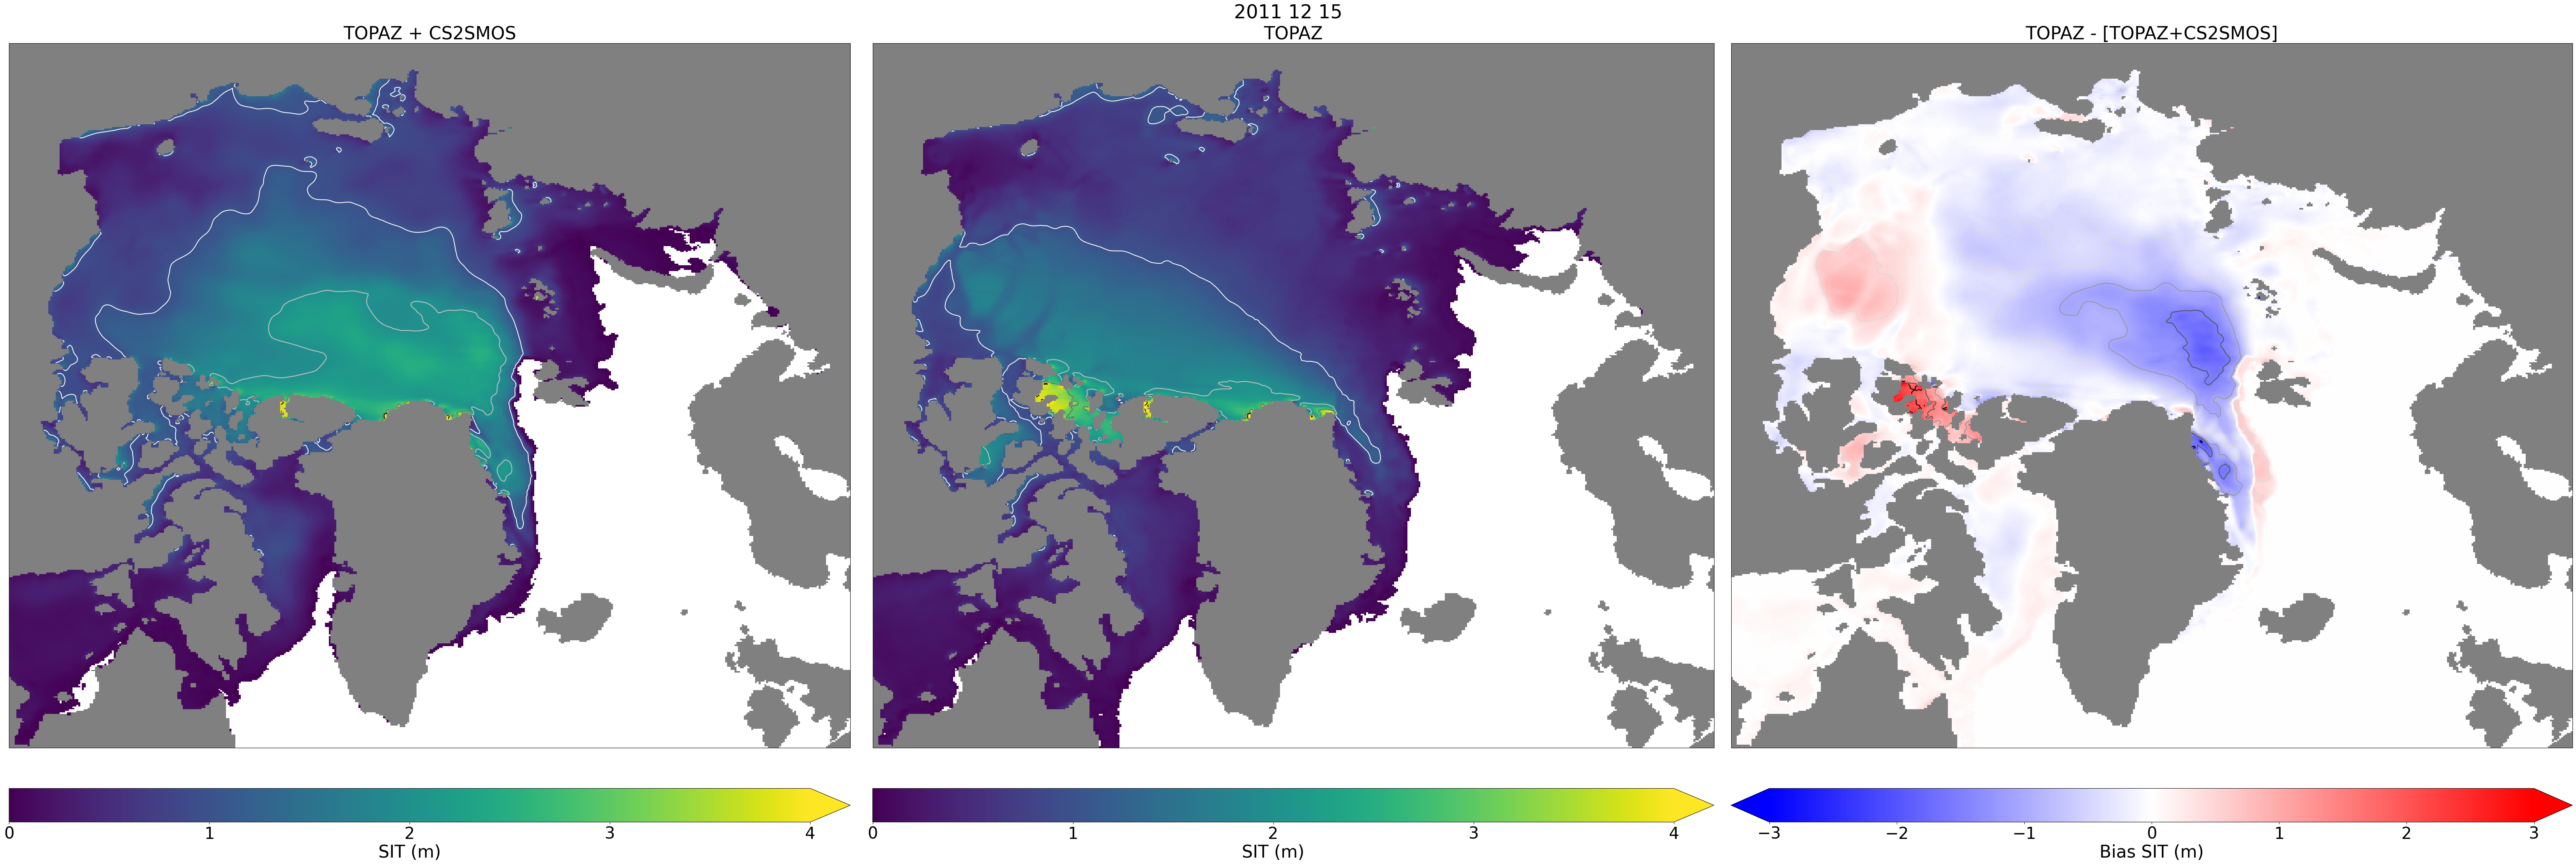

In [118]:
animate_topaz.draw_4b_fr_bias_23(sit_4b, sit_fr, chrono_4b, day, showfig=True, savefig=True, rootdir=rootdir, fig_dir=fig_dir)

In [18]:
day = datetime.datetime(2011,12,15)

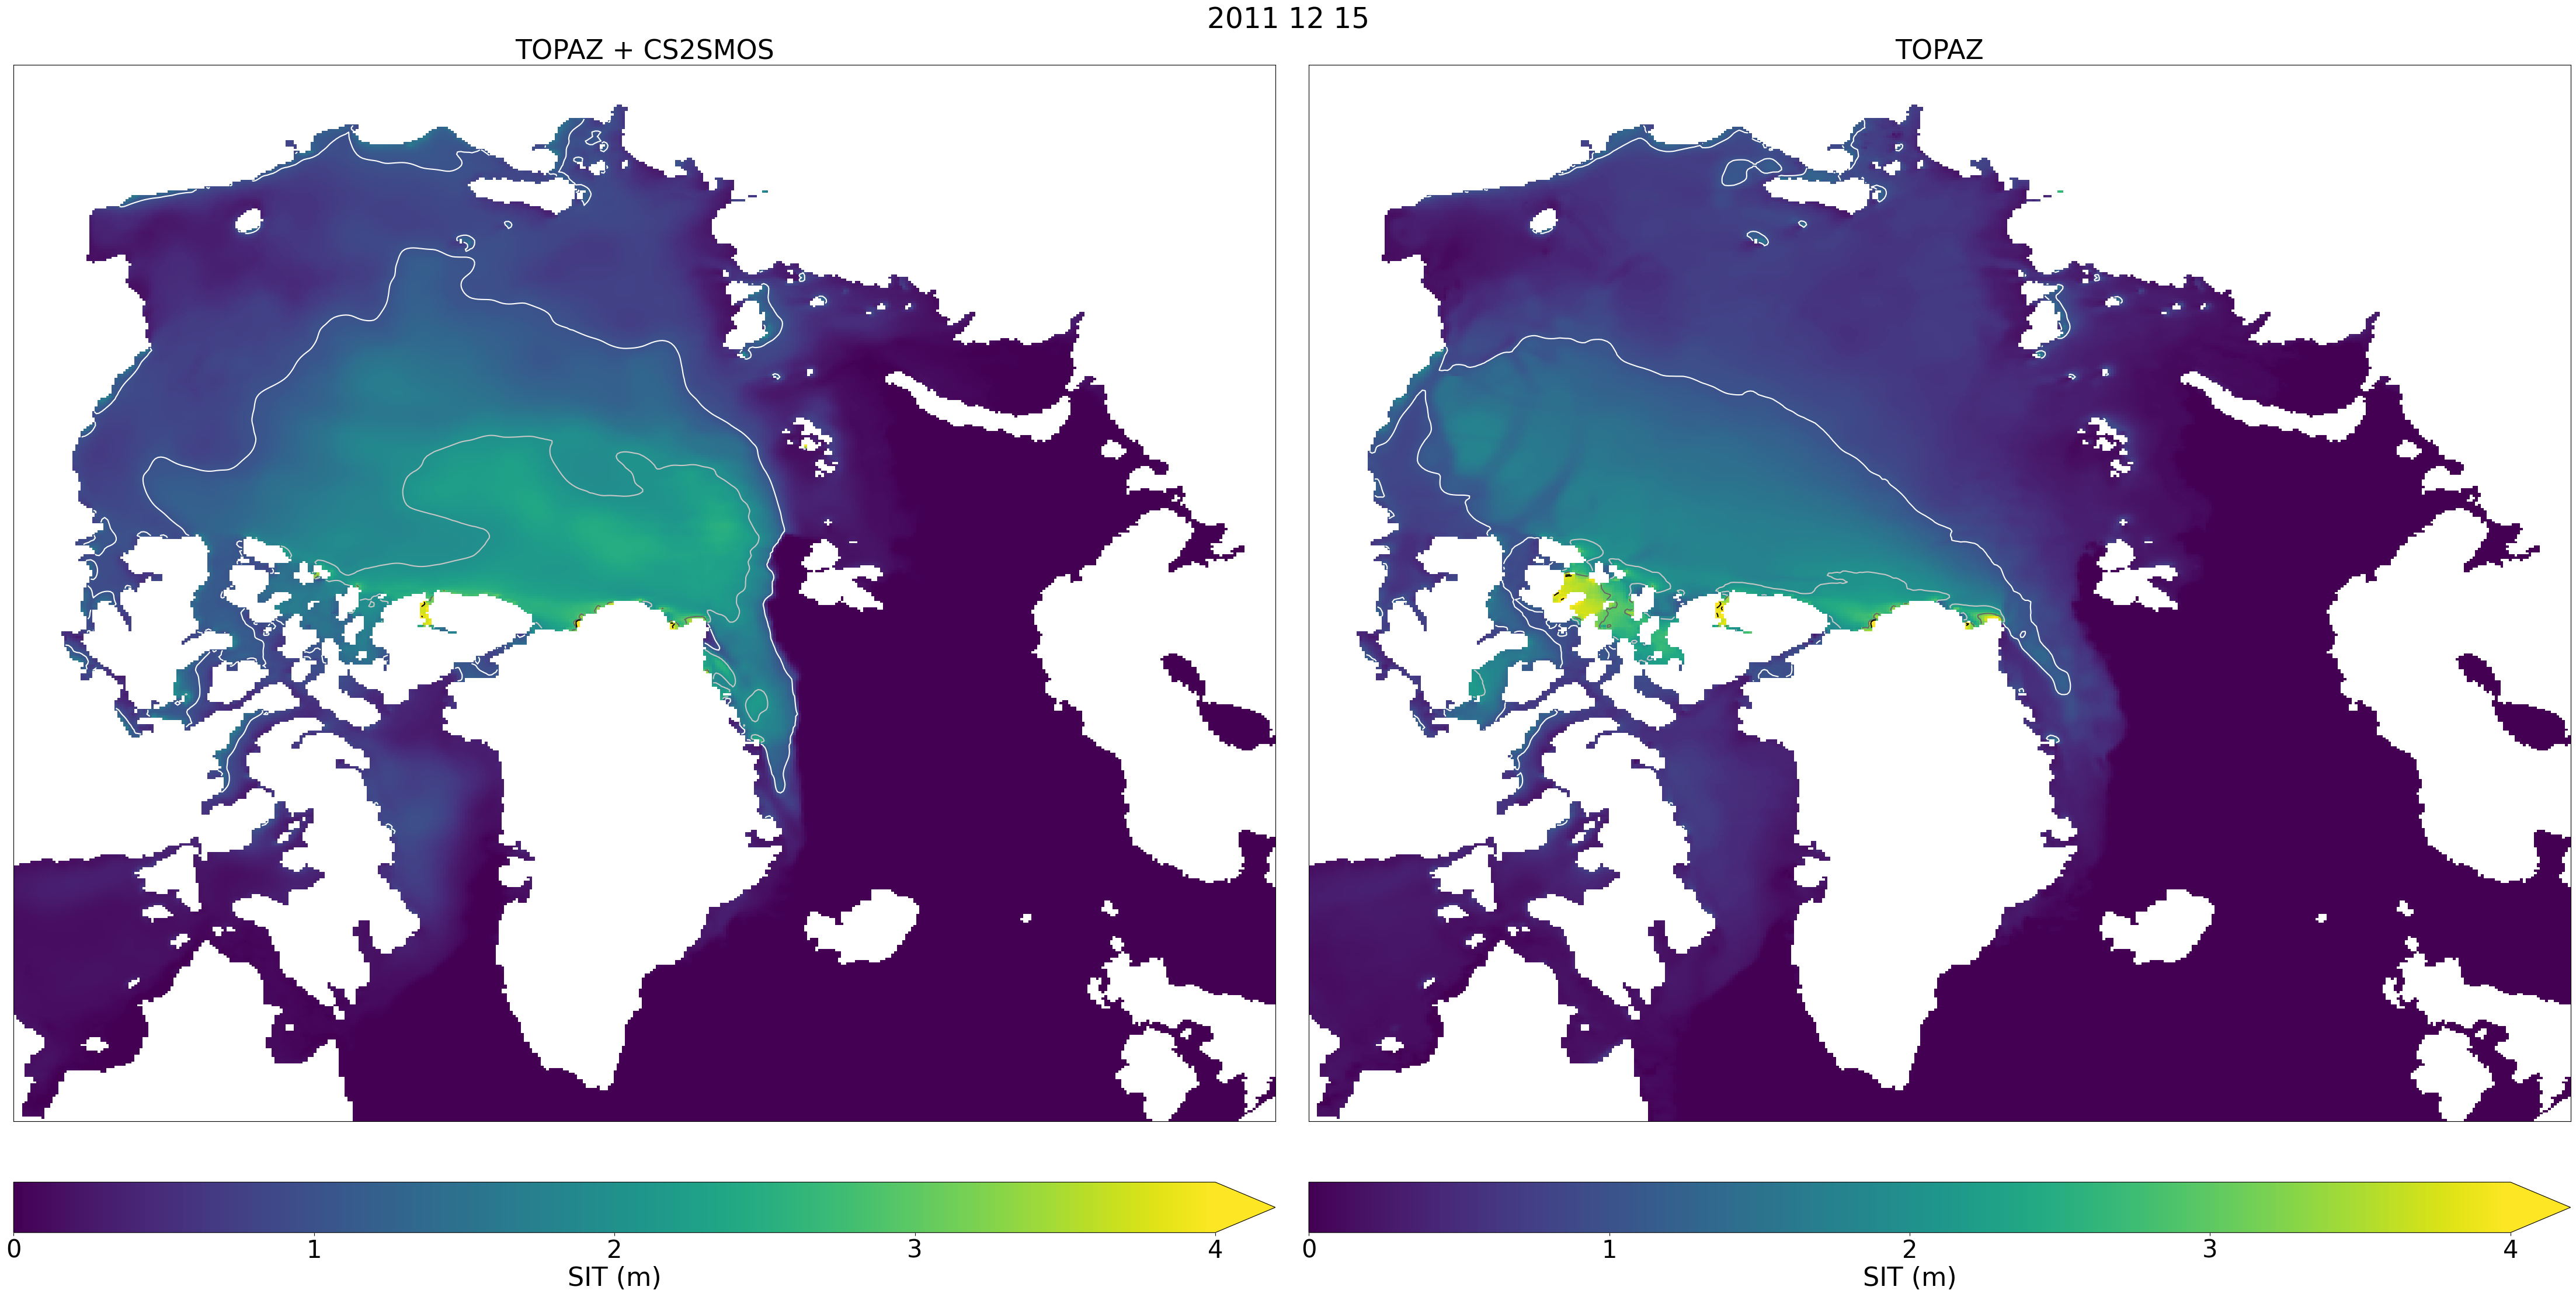

In [19]:
animate_topaz.draw_4b_fr_23(sit_4b, sit_fr, chrono_4b, day, showfig=True, savefig=False, rootdir=rootdir, fig_dir=fig_dir)

In [ ]:
# new plot: TOPAZ, TOPAZ + CS2SMOS, TOPAZ - [TOPAZ + CS2SMOS]

In [14]:
from src.utils import quickplot

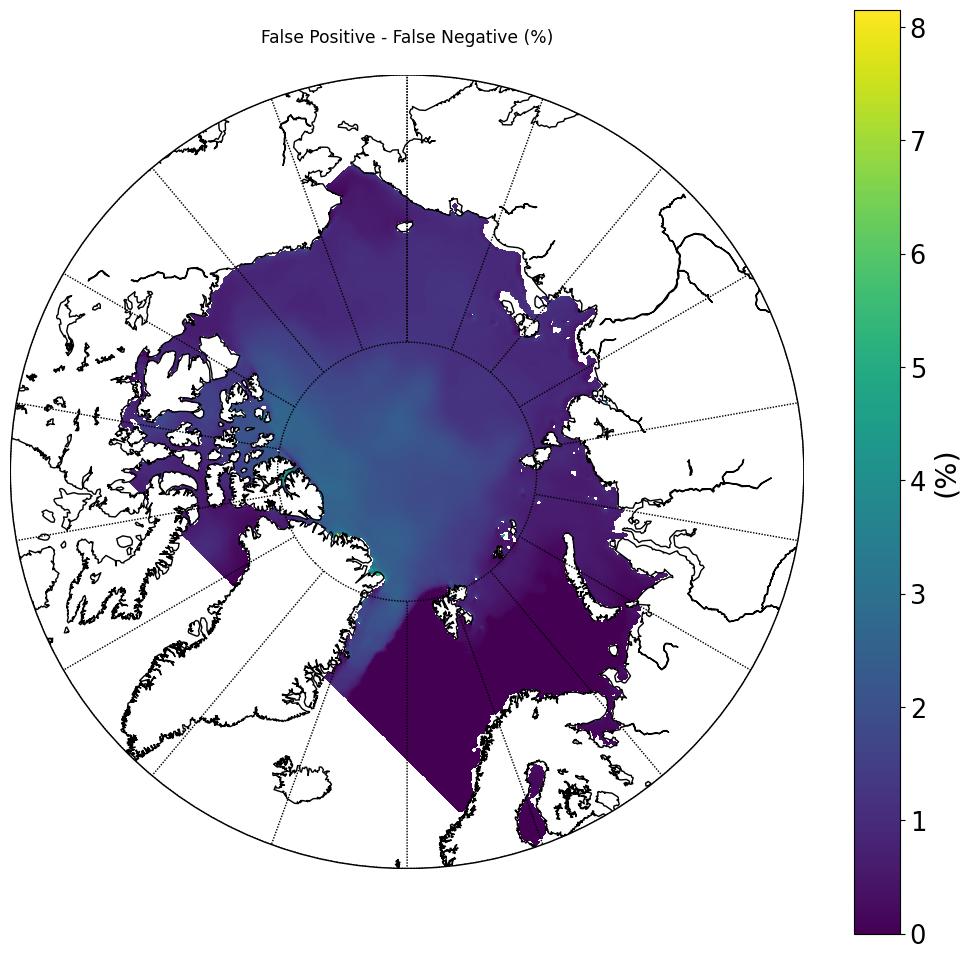

In [18]:
quickplot.basemap_mesh(sit_4b.longitude.data, sit_4b.latitude.data, sit_4b.isel(time=0).data)

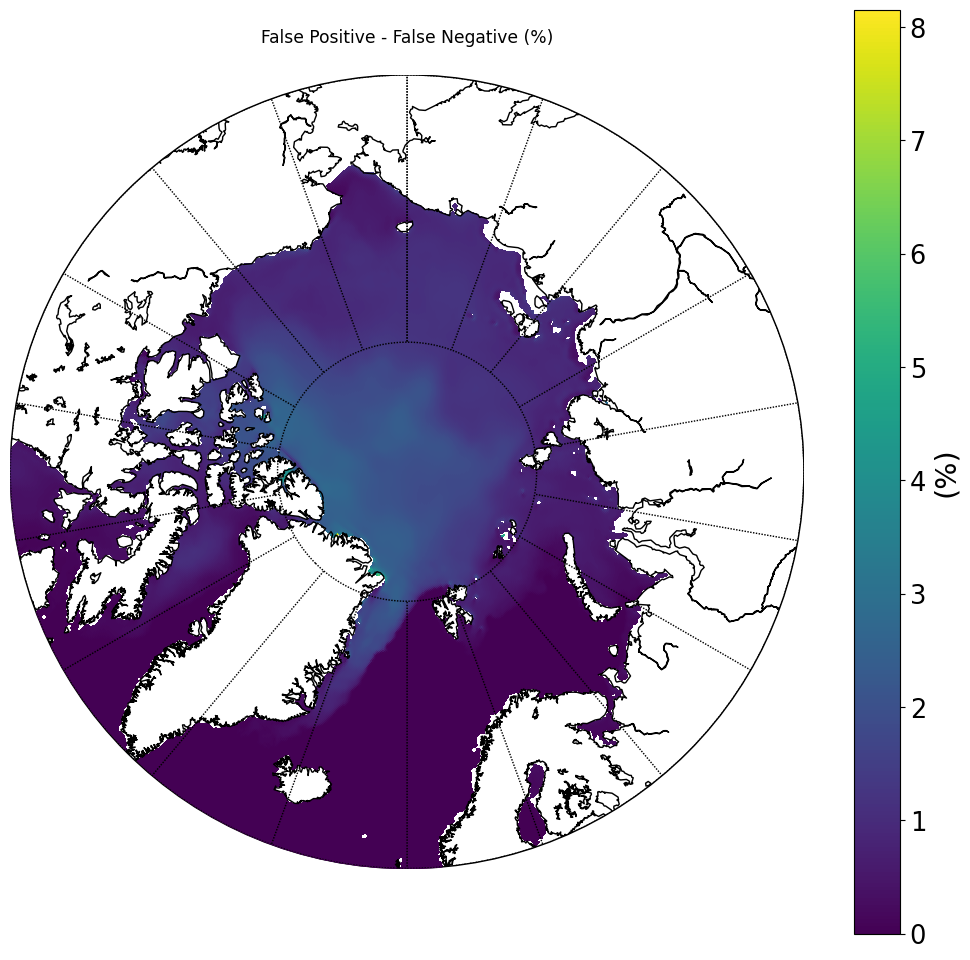

In [21]:
quickplot.basemap_mesh(sit_4b.longitude.data, sit_4b.latitude.data, sit_4b.isel(time=0).data)

In [11]:
d1 = datetime.datetime(2013,10,28) #   2010,11,1)
d2 = datetime.datetime(2022,12,31)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

In [12]:
animate_topaz.multiple_draw_4b_fr_bias_23(sit_4b, sit_fr, chrono_4b, all_days, rootdir=rootdir, fig_dir=fig_dir)

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120331.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120401.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120402.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120403.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120404.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120405.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120406.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120407.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120408.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120615.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120616.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120617.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120618.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120619.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120620.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120621.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120622.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120623.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120830.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120831.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120901.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120902.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120903.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120904.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120905.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120906.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20120907.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121114.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121115.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121116.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121117.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121118.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121119.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121120.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121121.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20121122.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130129.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130130.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130131.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130201.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130202.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130203.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130204.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130205.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130206.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130415.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130416.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130417.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130418.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130419.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130420.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130421.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130422.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130423.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130630.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130701.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130702.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130703.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130704.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130705.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130706.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130707.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130708.png
Saved as : /scratch/project_

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130914.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130915.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130916.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130917.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130918.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130919.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130920.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130921.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP4b23_re/TOPAZ4b23_FR_bias_20130922.png
Saved as : /scratch/project_

Traceback (most recent call last):
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_11883/3888884675.py", line 1, in <module>
    animate_topaz.multiple_draw_4b_fr_bias_23(sit_4b, sit_fr, chrono_4b, all_days, rootdir=rootdir, fig_dir=fig_dir)
  File "/users/edelleo1/tardis/tardis-ml/src/visualization/animate_topaz.py", line 23, in multiple_draw_4b_fr_bias_23
    draw_4b_fr_bias_23(sit_4b, sit_fr, chrono, day, rootdir, fig_dir, showfig=showfig, savefig=savefig)
  File "/users/edelleo1/tardis/tardis-ml/src/visualization/animate_topaz.py", line 106, in draw_4b_fr_bias_23
    plt.savefig(f"{ofile}", facecolor='white')
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/pyplot.py", line 959, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/figure.py", lin

Error in callback <function _draw_all_if_interactive at 0x7f7314334b80> (for post_execute):
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/pyplot.py", line 119, in _draw_all_if_interactive
    draw_all()
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/_pylab_helpers.py", line 132, in draw_all
    manager.canvas.draw_idle()
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2054, in draw_idle
    self.draw(*args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py", line 405, in draw
    self.figure.draw(self.renderer)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 51

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/formatters.py", line 340, in __call__
    return printer(obj)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/pylabtools.py", line 152, in print_figure
    fig.canvas.print_figure(bytes_io, **kw)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2314, in print_figure
    self.figure.draw(renderer)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer)
  File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-pac

<Figure size 6600x2200 with 6 Axes>

# Add CS2SMOS and Landy

## Import CS2SMOS

In [10]:
# get CS2SMOS
odir = f'{rootdir}Leo/SIT_observations/CS2SMOS/results/'
# ofile = f'CS2SMOS_SIT_mean_SIC15_20101115_20210415.nc'
# ofile = f'CS2SMOS_SIT_mean_20101115_20210415.nc'
# ofile = f'CS2SMOS_SIT_SIC_20101115_20210415.nc'
ofile = 'CS2SMOS_v205_20101101_20230415.nc'

# nc = xr.open_mfdataset(f'{odir}{ofile}', combine='nested', concat_dim='time')
nc = nc4.Dataset(f'{odir}{ofile}', mode='r')
cs2 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['analysis_sea_ice_thickness']
# cs2 = nc['analysis_sea_ice_thickness']


In [11]:
# Import TOPAZ land/ocean mask and put SIT = 0 when open ocean (just for nice plot)
idir = f'{rootdir}Leo/results/pca_i100-550_j150-629/'
ifile = 'land_mask_i100-550_j150-629.nc'

nc = nc4.Dataset(f'{idir}{ifile}', mode='r')
mask_ol = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sithick']

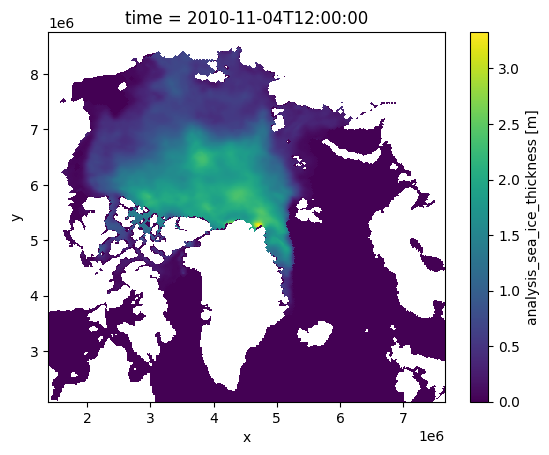

In [21]:
cs2.isel(time=0).where(((cs2.isel(time=0).isnull())&mask_ol.data<1),0).plot()

In [12]:
# if CS2SMOS is Nan and mask show open water: put 0
sit_cs2 = cs2.where(((cs2.isnull())&mask_ol.data<1),0)

In [13]:
sitm_cs2 = cs2.mean(('y','x'))

## Import Landy 2022 reprojected

In [14]:
odir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/Landy_2022/'
ofile = f'ubristol_cryosat2_seaicethickness_nh_80km_v1p7_reproj_TOPAZ4b_TARDIS_new.nc'

nc = xr.open_mfdataset(f'{odir}{ofile}')

sit_l = nc['Sea_Ice_Thickness']

chrono_l = pd.DataFrame({'date':pd.to_datetime(sit_l.time.to_numpy())})

In [15]:
sic_l = nc['Sea_Ice_Concentration']


In [16]:
sitm_l = sit_l.where(sic_l>.15).mean(dim=('y','x')).compute()

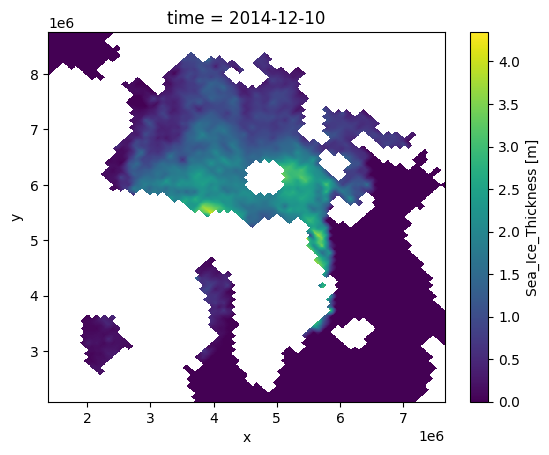

In [24]:
sit_l.isel(time=100).plot()

# Nice plot

In [17]:
from src.visualization import animate_topaz

In [19]:
from importlib import reload

In [18]:
fig_dir = 'Leo/results/animate_TP_423_CS_Ld_v2/'

In [10]:
d1 = datetime.datetime(2011,1,1) #   2010,11,1)
d2 = datetime.datetime(2011,1,3)

# d2 = datetime.datetime(2022,12,31)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

In [266]:
animate_topaz.multiple_draw_4b_fr_cs_ld(sit_4b, sit_fr, sit_cs2, sit_l, chrono_l, all_days, rootdir=rootdir, fig_dir=fig_dir)

Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP_423_CS_Ld/TOPAZ4b23_FR_CS2SMOS_Landy_20110101.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP_423_CS_Ld/TOPAZ4b23_FR_CS2SMOS_Landy_20110102.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/animate_TP_423_CS_Ld/TOPAZ4b23_FR_CS2SMOS_Landy_20110103.png


In [19]:
day = datetime.datetime(2018,1,3)

In [59]:
from importlib import reload

In [133]:
reload(animate_topaz)

<module 'src.visualization.animate_topaz' from '/users/edelleo1/tardis/tardis-ml/src/visualization/animate_topaz.py'>

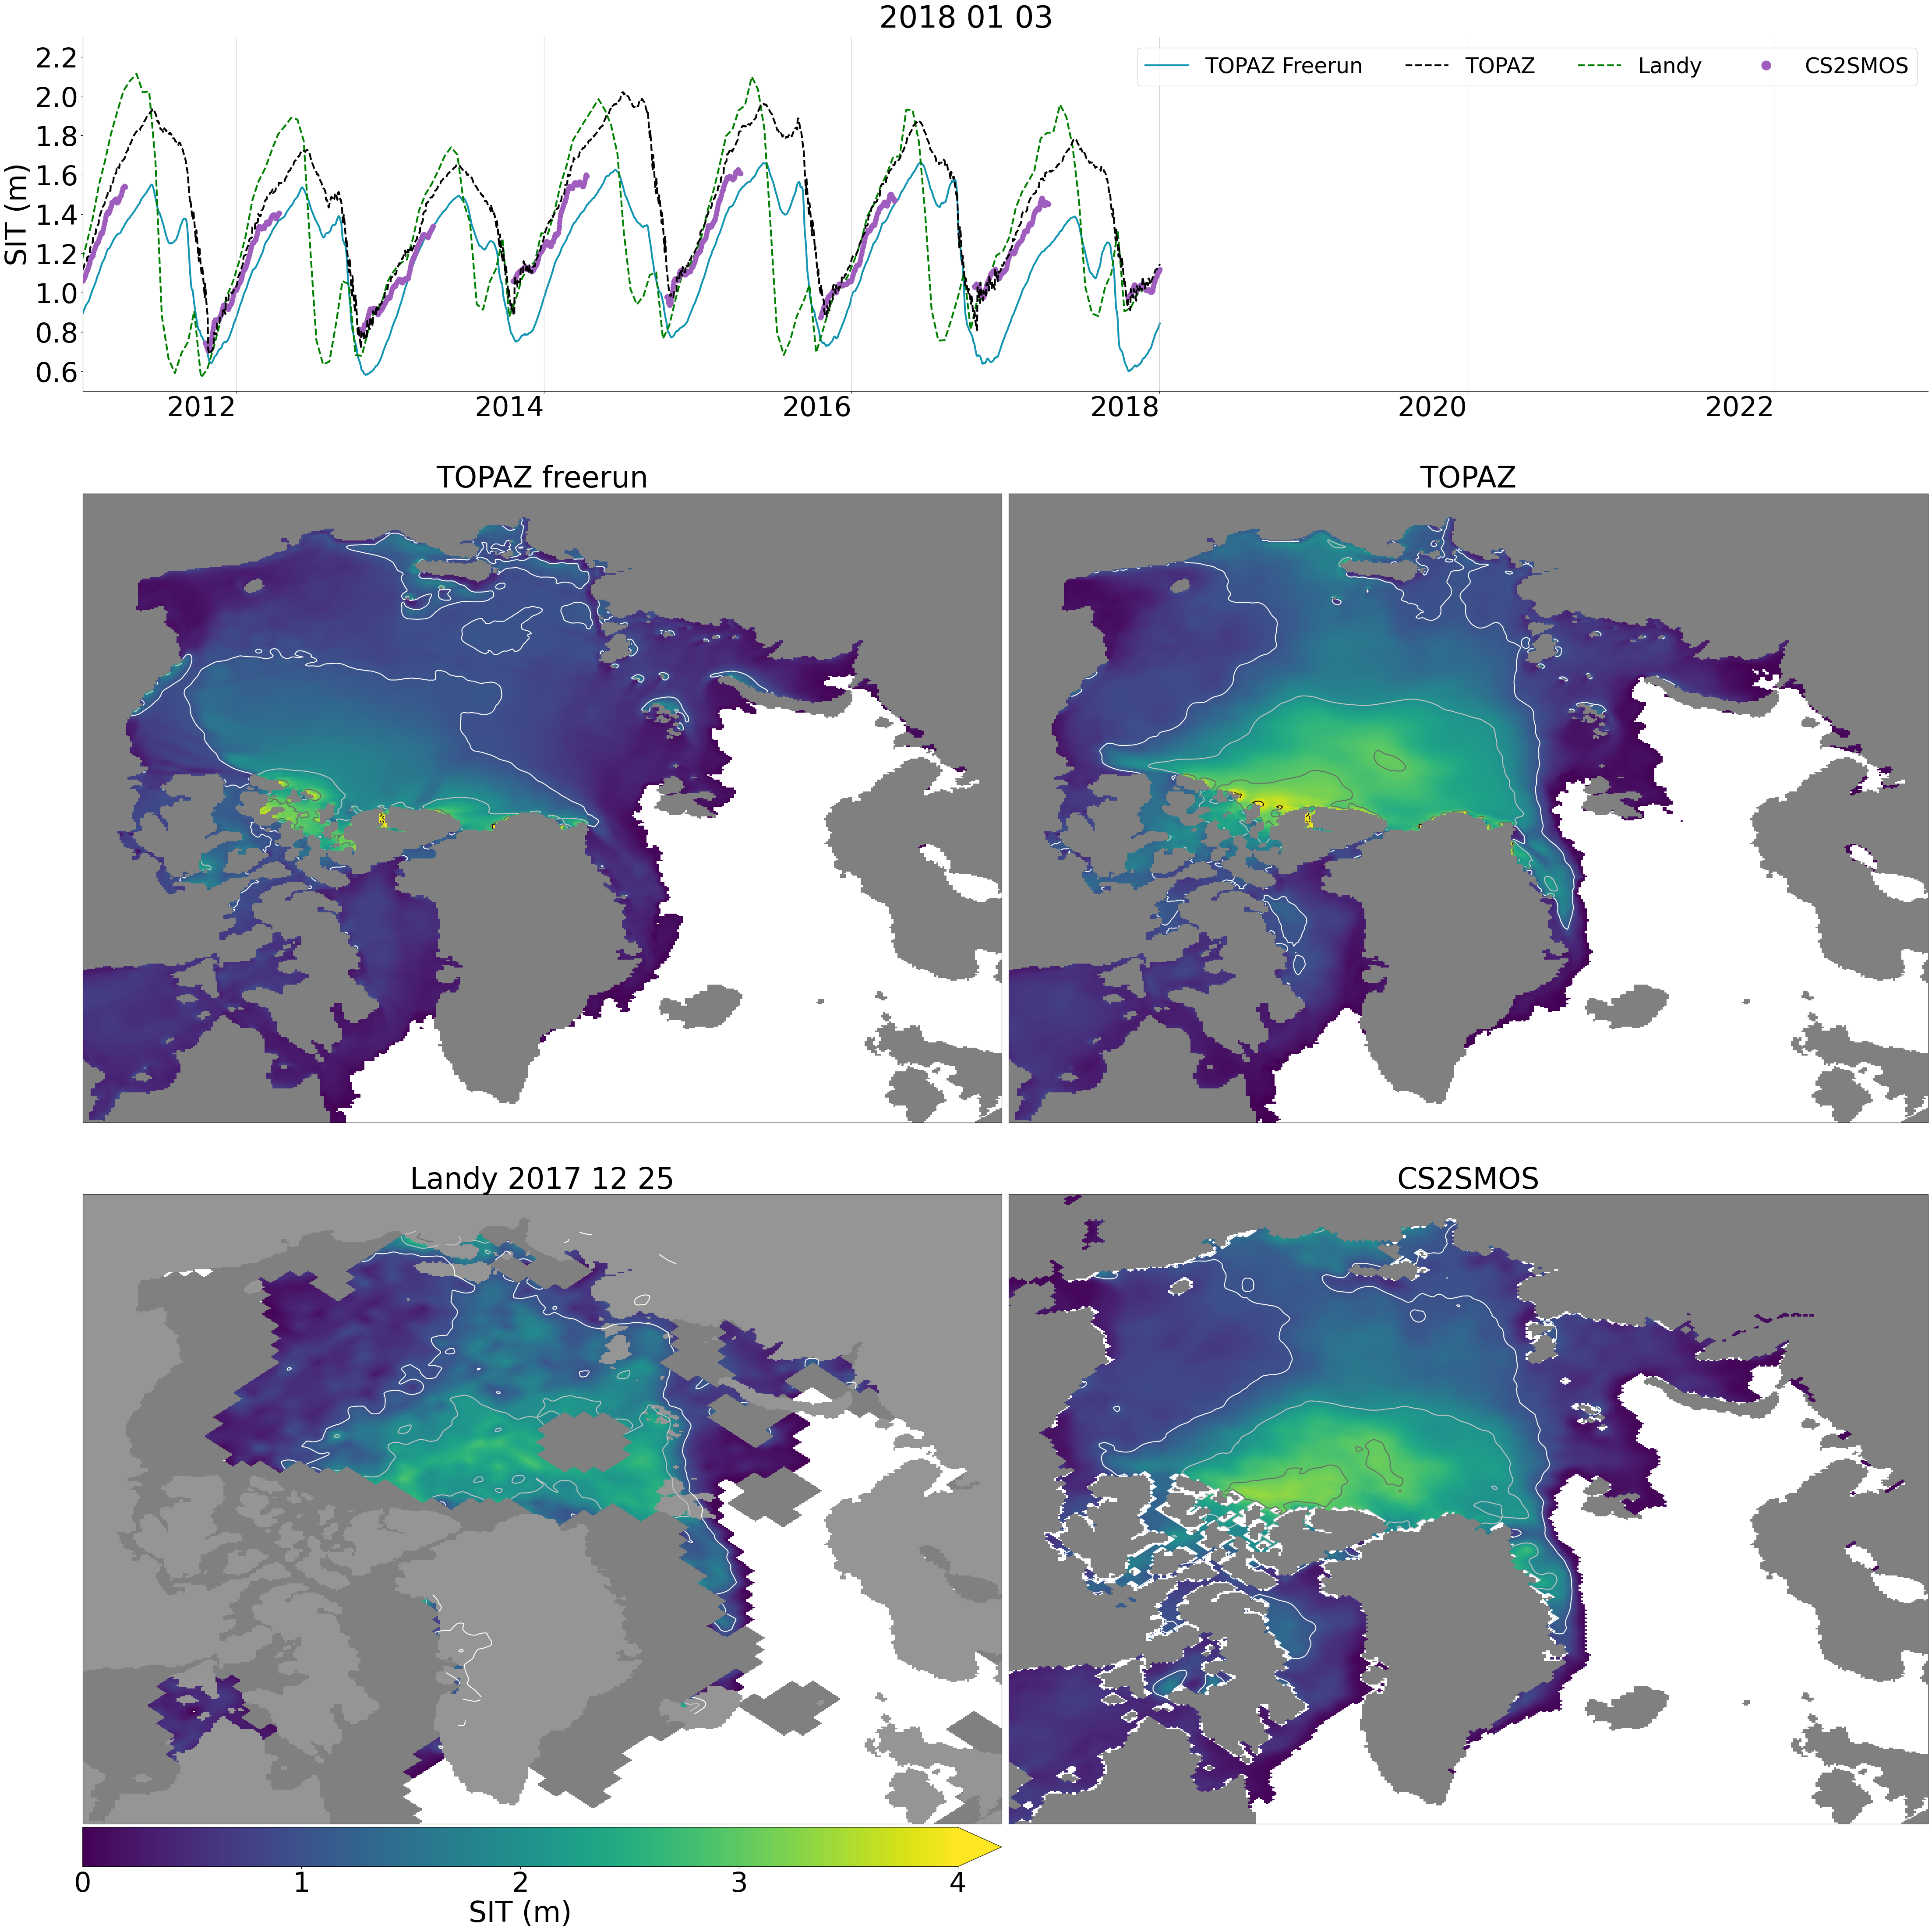

In [20]:
animate_topaz.draw_4b_fr_cs_ld_v2p(sit_4b, sit_fr, sit_cs2, sit_l, 
                                   chrono_l, day,
                                   sitm_4b, sitm_fr, sitm_cs2, sitm_l,
                                  savefig=False, showfig=True)

In [144]:
def draw_4b_fr_cs_ld_v2(Xa, Xf, Xc, Xl, chrono_l, day, rootdir='', fig_dir='', showfig=True, savefig=False):
    '''
    Parameters:
    -----------
    
        Xa          : SIT assimilated
        Xf          : SIT free run
        Xc          : SIT from CS2SMOS
        Xl          : SIT from Landy product
        chrono_l    : datetime array for landy product (because time axis is fucking shit)
        
        Xa and Xf must have the same chrono (time axis)
    '''
    
    # Parameters for colormap
    vmin = 0
    vmax = 4
    my_cmap = plt.cm.get_cmap('viridis')
    my_cmap.set_under('white')       
    
    # identify index to plot
    chrono_tp = pd.DataFrame({'date':pd.to_datetime(Xa['time'].to_numpy())})
    chrono_dt = np.array([dt.date() for dt in chrono_tp.date])
    idx = np.where(chrono_dt==day.date())[0]

    # index for cs2smos
    chrono_cs2 = pd.DataFrame({'date':pd.to_datetime(Xc['time'].to_numpy())})
    chrono_dt_cs2 = np.array([dt.date() for dt in chrono_cs2.date])
    idx_c = np.where(chrono_dt_cs2==day.date())[0]
    
    # index for Landy
    # select the most recent (and past) observation
    chrono_dt_l = np.array([dt.date() for dt in chrono_l.date])
    idx_l = (np.where(chrono_dt_l-day.date()<datetime.timedelta(days=0))[0]).argmax()
    
    # get TOPAZ land mask to plot on top of Landy
    land_mask = Xa.isel(time=0).isnull()
    land_mask = land_mask.where(land_mask>0.5)
    land_mask2 = land_mask.assign_coords({'y':sit_l.y, 'x':sit_l.x})  # need same coordinates than Landy






    # put SIT < 0.002 m as SIT = -1
    # will be white areas on plot
    Xa_ = Xa.isel(time=idx).where((Xa.isel(time=idx)>0.002) | Xa.isel(time=idx).isnull(), -1)
    Xf_ = Xf.isel(time=idx).where((Xf.isel(time=idx)>0.002) | Xf.isel(time=idx).isnull(), -1)
    Xc_ = Xc.isel(time=idx_c).where((Xc.isel(time=idx_c)>0.002) | Xc.isel(time=idx_c).isnull(), -1)
    Xl_ = Xl.isel(time=idx_l).where((Xl.isel(time=idx_l)>0.002) | Xl.isel(time=idx_l).isnull(), -1)
    
    
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(22*2,22*2), constrained_layout=True)
    
    

    imC = Xf_.plot(ax=axes[0][0], vmin=vmin, vmax=vmax, add_colorbar=True, cmap=my_cmap,
                                  extend='max', cbar_kwargs={'orientation':'horizontal',
                                                                       'label':'SIT (m)',
                                                                       'ticks':[0,1,2,3,4], 'aspect':25})
    Xa_.plot(ax=axes[0][1], vmin=vmin, vmax=vmax, add_colorbar=True, cmap=my_cmap,
                          extend='max', cbar_kwargs={'orientation':'horizontal',
                                                                       'label':'SIT (m)',
                                                                       'ticks':[0,1,2,3,4], 'aspect':25})
    Xl_.plot(ax=axes[1][0], vmin=vmin, vmax=vmax, add_colorbar=True, cmap=my_cmap,
                          extend='max', cbar_kwargs={'orientation':'horizontal',
                                                                       'label':'SIT (m)',
                                                                       'ticks':[0,1,2,3,4], 'aspect':25})
    land_mask2.where(land_mask2>0.5).plot(ax=axes[1][0], add_colorbar=False, cmap=plt.get_cmap('Greys'))
#     plt.show()
#     return
    
    if idx_c.size > 0:
        Xc_.plot(ax=axes[1][1], vmin=vmin, vmax=vmax, add_colorbar=True, cmap=my_cmap,
                              extend='max', cbar_kwargs={'orientation':'horizontal',
                                                                       'label':'SIT (m)',
                                                                       'ticks':[0,1,2,3,4], 'aspect':25})       
        
    # contour plot
    levels = np.arange(1, vmax+1, 1)
    cl = Xa.isel(time=idx[0]).plot.contour(ax=axes[0][1], levels=levels, vmin=0, vmax=vmax, add_colorbar=False, cmap=plt.get_cmap('Greys'))
    cl = Xf.isel(time=idx[0]).plot.contour(ax=axes[0][0], levels=levels, vmin=0, vmax=vmax, add_colorbar=False, cmap=plt.get_cmap('Greys'))
    
    if idx_c.size > 0:
        cl = Xc.isel(time=idx_c[0]).plot.contour(ax=axes[1][1], levels=levels, vmin=0, vmax=vmax, add_colorbar=False, cmap=plt.get_cmap('Greys'))
    
    cl = Xl.isel(time=idx_l).plot.contour(ax=axes[1][0], levels=levels, vmin=0, vmax=vmax, add_colorbar=False, cmap=plt.get_cmap('Greys'))
    
    
    axes[0][0].set_title('TOPAZ freerun')
    axes[0][1].set_title('TOPAZ')
    axes[1][0].set_title(f'Landy {chrono_l.iloc[idx_l].date.strftime("%Y %m %d")}')
    if idx_c.size > 0:
        axes[1][1].set_title('CS2SMOS')
    else:
        axes[1][1].set_visible(False)

   
    for ax in axes.flatten():
        ax.set_facecolor('grey')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    
    
    fig.suptitle(f'{chrono_dt[idx][0].strftime("%Y %m %d")}')
    modif_plot.resize(fig, s=45)

    
    if savefig:
        sdate = chrono_dt[idx][0].strftime("%Y%m%d")
        ofile = f'{rootdir}{fig_dir}TOPAZ4b23_FR_CS2SMOS_Landy_{sdate}.png'
        plt.savefig(f"{ofile}", facecolor='white')
        print(f'Saved as : {ofile}')
    
    if showfig:
        plt.show()
    
    plt.close()  
